In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,r2_score
import joblib
import json
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression

In [2]:
df = pd.read_csv("flood.csv")

In [3]:
df

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [4]:
df.info

<bound method DataFrame.info of        MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                     3                   8                6              6   
1                     8                   4                5              7   
2                     3                  10                4              1   
3                     4                   4                2              7   
4                     3                   7                5              2   
...                 ...                 ...              ...            ...   
49995                 3                   7                4              7   
49996                 3                  10                3              8   
49997                 4                   4                5              7   
49998                 4                   5                4              4   
49999                 4                   5                6              3   

       Urbanization

In [5]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of        MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                     3                   8                6              6   
1                     8                   4                5              7   
2                     3                  10                4              1   
3                     4                   4                2              7   
4                     3                   7                5              2   
...                 ...                 ...              ...            ...   
49995                 3                   7                4              7   
49996                 3                  10                3              8   
49997                 4                   4                5              7   
49998                 4                   5                4              4   
49999                 4                   5                6              3   

       Urbanizati

In [7]:
df.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.head

<bound method NDFrame.head of        MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                     3                   8                6              6   
1                     8                   4                5              7   
2                     3                  10                4              1   
3                     4                   4                2              7   
4                     3                   7                5              2   
...                 ...                 ...              ...            ...   
49995                 3                   7                4              7   
49996                 3                  10                3              8   
49997                 4                   4                5              7   
49998                 4                   5                4              4   
49999                 4                   5                6              3   

       Urbanization  

In [10]:
df.tail

<bound method NDFrame.tail of        MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                     3                   8                6              6   
1                     8                   4                5              7   
2                     3                  10                4              1   
3                     4                   4                2              7   
4                     3                   7                5              2   
...                 ...                 ...              ...            ...   
49995                 3                   7                4              7   
49996                 3                  10                3              8   
49997                 4                   4                5              7   
49998                 4                   5                4              4   
49999                 4                   5                6              3   

       Urbanization  

In [11]:
FEATURES = ["MonsoonIntensity", "TopographyDrainage", "RiverManagement",
       "Deforestation", "Urbanization", "ClimateChange", "DamsQuality",
       "Siltation", "AgriculturalPractices", "Encroachments",
       "IneffectiveDisasterPreparedness", "DrainageSystems",
       "CoastalVulnerability", "Landslides", "Watersheds",
       "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss",
       "InadequatePlanning", "PoliticalFactors"]
X = df[FEATURES]

In [12]:
X

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,4,7,3,8,8,6,1,5,4,2
49996,3,10,3,8,3,3,4,4,3,11,8,8,6,3,6,4,4,2,4,5
49997,4,4,5,7,2,1,4,5,6,7,7,4,6,4,1,5,1,6,4,3
49998,4,5,4,4,6,3,10,2,6,11,5,6,3,4,7,6,2,4,0,11


In [13]:
Y_x = df["FloodProbability"]
y_cls = Y_x.astype(str)
le = LabelEncoder()
y = le.fit_transform(y_cls)
prob_map = {"Low":0,"Moderate":0.5,"High":1}
y_reg = Y_x.map(prob_map).astype(float)

In [14]:
Y_x

0        0.450
1        0.475
2        0.515
3        0.520
4        0.475
         ...  
49995    0.535
49996    0.510
49997    0.430
49998    0.515
49999    0.580
Name: FloodProbability, Length: 50000, dtype: float64

In [15]:
y_reg

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
49995   NaN
49996   NaN
49997   NaN
49998   NaN
49999   NaN
Name: FloodProbability, Length: 50000, dtype: float64

In [16]:
y_cls

0         0.45
1        0.475
2        0.515
3         0.52
4        0.475
         ...  
49995    0.535
49996     0.51
49997     0.43
49998    0.515
49999     0.58
Name: FloodProbability, Length: 50000, dtype: object

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)
y_reg_train,y_reg_test = train_test_split(y_reg,test_size=0.2,shuffle=False)

In [18]:
scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.fit_transform(X_test)

In [19]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=10,max_features="sqrt",random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [20]:
rfr = RandomForestRegressor(n_estimators=50,random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [21]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_trains,y_train)

LogisticRegression(max_iter=200)

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X_trains,y_train)

LinearRegression()

In [23]:
y_pred_s1 = log_reg.predict(X_tests)

In [24]:
y_pred_s1

array([41, 26, 24, ..., 24, 42, 51])

In [25]:
y_pred_s2 = lin_reg.predict(X_tests)

In [26]:
y_pred_s2

array([41.90711488, 23.83365852, 21.86992144, ..., 23.82288265,
       40.7389069 , 53.87976173])

In [27]:
X_test = np.array(X_test)

In [28]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [30]:
y_pred_Z = rfc.predict(X_test)
y_pred_z = rfr.predict(X_test)

In [31]:
print("Accuracy:\n",accuracy_score(y_test,y_pred_Z))
print("\nClassification Report:\n",classification_report(y_test,y_pred_Z))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred_Z))

Accuracy:
 0.0534

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00        26
          16       0.00      0.00      0.00        30
          17       0.00      0.00      0.00        36
          18       0.00      0.00      0.00        65
          19       0.00      0.00     

In [32]:
print("Accuracy:\n",accuracy_score(y_test,y_pred_s1))
print("\nClassification Report:\n",classification_report(y_test,y_pred_s1))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred_s1))

Accuracy:
 0.3857

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       1.00      0.09      0.17        11
          12       0.22      0.11      0.15        18
          13       0.11      0.07      0.08        15
          14       0.00      0.00      0.00        18
          15       0.33      0.08      0.12        26
          16       0.12      0.03      0.05        30
          17       0.00      0.00      0.00        36
          18       0.06      0.02     

In [33]:
cm = confusion_matrix(y_test,y_pred_Z)

In [34]:
cm1 = confusion_matrix(y_test,y_pred_s1)

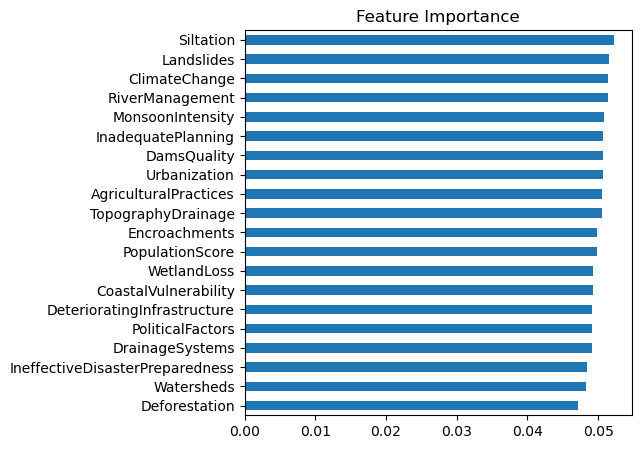

In [35]:
importances = pd.Series(rfc.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(5,5))
plt.title("Feature Importance")
plt.show()

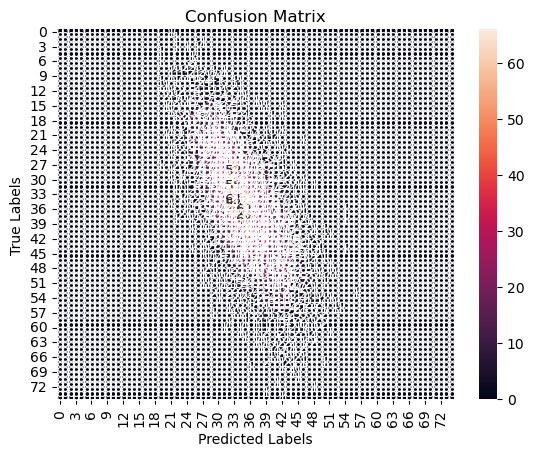

In [36]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

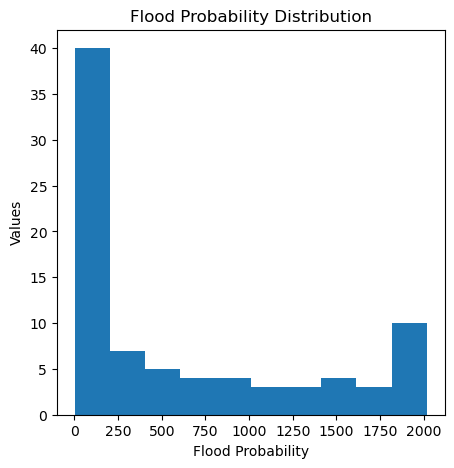

In [37]:
df["FloodProbability"].value_counts().plot(kind="hist", figsize=(5,5))
plt.xlabel("Flood Probability")
plt.ylabel("Values")
plt.title("Flood Probability Distribution")
plt.show()

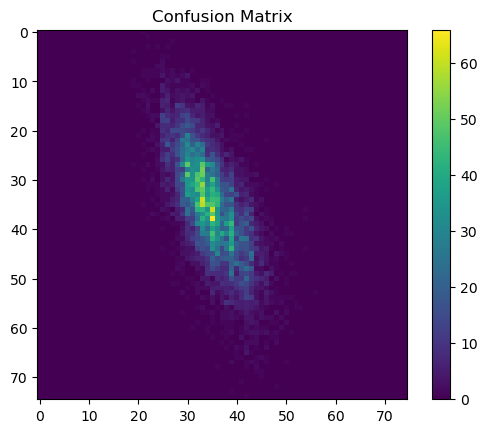

In [38]:
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

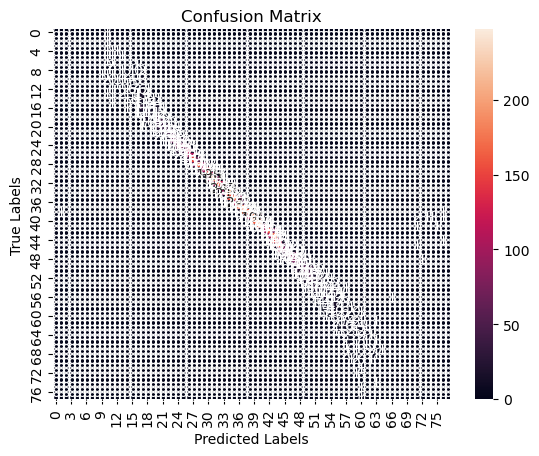

In [39]:
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

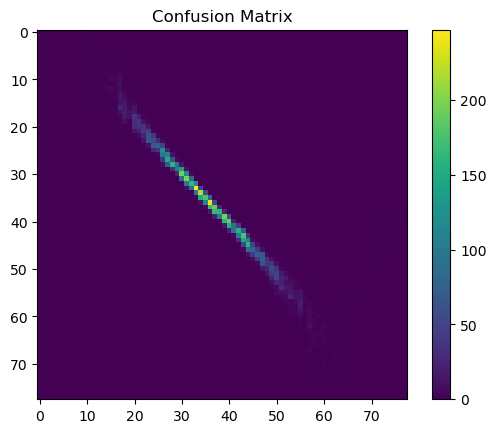

In [40]:
plt.imshow(cm1, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

In [41]:
mse = mean_squared_error(y_test,y_pred_Z)
r2 = r2_score(y_test,y_pred_Z)

In [42]:
mse

58.8202

In [43]:
r2

0.4124297552920818

In [44]:
mse_1 = mean_squared_error(y_test,y_pred_s1)
r2_1 = r2_score(y_test,y_pred_s1)

In [45]:
mse_1

3.6232

In [46]:
r2_1

0.9638069147907398

In [47]:
mse_2 = mean_squared_error(y_test,y_pred_s2)
r2_2 = r2_score(y_test,y_pred_s2)

In [48]:
mse_2

0.029617096990046894

In [49]:
r2_2

0.999704147130986

In [50]:
mse_3 = mean_squared_error(y_test,y_pred_z)
r2_3 = r2_score(y_test,y_pred_z)

In [51]:
mse_3

27.29287832

In [52]:
r2_3

0.7273643545369476

In [60]:
best_model = {"Logistic Regression": log_reg,
             "Linear Regression": lin_reg,
             "Random Forest Classifier": rfc,
             "Random Forest Regressor": rfr,
             "Label Encoder": le,
             "Standard Scaler": scaler}

joblib.dump({"model": best_model, "features": X.columns.tolist()}, "B:/Videos/Flood_risk_prediction/flood_model.joblib",compress=9)

['B:/Videos/Flood_risk_prediction/flood_model.joblib']

In [57]:
# Example (use your actual y_test and y_pred)
accuracy = accuracy_score(y_test, y_pred_Z)
class_report = classification_report(y_test, y_pred_Z, output_dict=True)  # dict format
conf_matrix = confusion_matrix(y_test, y_pred_Z).tolist()  # convert NumPy array to list

# Put results in metrics dictionary
metrics = {
    "Accuracy": accuracy,
    "Classification Report": class_report,
    "Confusion Matrix": conf_matrix
}

In [58]:
save_path = "B:\Videos\Flood_risk_prediction/metrics.json"
with open(save_path,"w") as f:
    json.dump(metrics,f,indent=2)